PyTorch dynamically builds a computation graph for every operation involving tensors with requires_grad=True. This graph enables automatic differentiation for deep learning and optimization.

# **1. What is a Computation Graph?**


* A computation graph is a **directed acyclic graph (DAG)** where:

    * **Nodes** represent tensors (variables).

    * **Edges** represent operations (functions).

    * The **graph is built dynamically**, meaning it is created on the fly during forward computation.

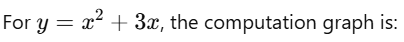

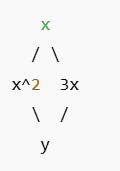

When .backward() is called, PyTorch traces backward through the graph to compute gradients.

# **Computation Graph**

In [1]:
import torch

x = torch.tensor(2.0, requires_grad=True)  # Enable autograd
y = x ** 2 + 3 * x  # Define function
y.backward()  # Compute gradients

print(x.grad)  # Output: dy/dx = 2x + 3 = 2(2) + 3 = 7


tensor(7.)


# **3. How PyTorch Builds the Computation Graph**

Every PyTorch operation on a tensor records a function in .grad_fn, which helps track the graph.



In [2]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2 + 3 * x

print(y.grad_fn)  # Shows the operation: <AddBackward0>
print(y.grad_fn.next_functions)  # Shows previous ops


((<PowBackward0 object at 0x7e704086fbe0>, 0), (<MulBackward0 object at 0x7e704086fdc0>, 0))


* grad_fn stores how y was computed.

* next_functions links to previous operations.

# **4. Visualizing the Computation Graph**

You can use torchviz to visualize the computation graph.

In [4]:
! pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [5]:
from torchviz import make_dot

x = torch.tensor(2.0, requires_grad=True)
y = x ** 3 + 2 * x

make_dot(y, params={"x": x}).render("computation_graph", format="png")


'computation_graph.png'

This will generate a PNG showing the graph structure.

# **5. Dynamic Graph: Why PyTorch is Different from TensorFlow**

* Unlike TensorFlow’s static computation graph, PyTorch’s dynamic graph:

* Rebuilds itself on every forward pass.

* Allows debugging using Python print statements.

* Enables flexible model architectures (e.g., RNNs).

# **Example of Dynamic Graph**

In [6]:
for i in range(3):
    x = torch.tensor(float(i), requires_grad=True)
    y = x ** 2
    y.backward()
    print(x.grad)  # Computes new gradients for each iteration


tensor(0.)
tensor(2.)
tensor(4.)


Each loop creates a new graph, which is useful for complex architectures.



# **6. Detaching Tensors to Break the Graph**

To stop gradient tracking:

    * Use **.detach()**

    * Use **torch.no_grad()**

In [7]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2

y_detached = y.detach()  # Removes y from graph
print(y_detached.requires_grad)  # False


False


In [8]:
with torch.no_grad():
    y = x ** 2
print(y.requires_grad)  # False


False


# **7. Summary**


✅  PyTorch builds dynamic computation graphs.


✅  .grad_fn stores operation history.


✅  .backward() computes gradients via backpropagation.


✅  Use detach() or torch.no_grad() to disable autograd.